<a href="https://colab.research.google.com/github/andrelbourgeois/CASA0018/blob/main/practiceRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving light-400.csv to light-400 (5).csv
401
     light
0     30.0
1      9.2
2      2.4
3      2.4
4      5.4
..     ...
396   46.0
397   46.0
398   33.4
399    8.4
400    6.0

[401 rows x 1 columns]
361
40
361
20
40
20


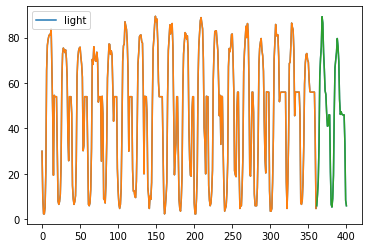

In [9]:
import io
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
#Generates batches for sequence data
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files

#load sensor data from csv
uploaded = files.upload()

#load into dataframe
df = pd.read_csv('light-400.csv')
print(len(df))
print(df)
df.plot()

#split into training and validation data
val_percent = 0.1  #10% of data
val_point = np.round(len(df)*val_percent)
val_index = int(len(df) - val_point)
training = df.iloc[:val_index]
validation = df.iloc[val_index:]

print(len(training))
print(len(validation))

plt.plot(training)
plt.plot(validation)

#normalise the data set
scaler = MinMaxScaler(copy=True, feature_range=(0,1))
scaler.fit(training)
scaled_training = scaler.transform(training)
scaled_validation = scaler.transform(validation)

#time series generator
length = 20 #sequence length - the length of the training window
batch_size = 5

training_generator = TimeseriesGenerator(data=scaled_training, targets=scaled_training, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(data=scaled_validation, targets=scaled_validation, length=length, batch_size=batch_size)

print(len(scaled_training)) #should be 361
print(training_generator.length)
print(len(scaled_validation)) #should be 40
print(validation_generator.length)
